# Problem 8

**Three Server Organizations**:  in the following figure, we show three data center systems with the same arriving rate $\lambda$ and the same total service rate $k \mu$ : FDM, M/M/1 and M/M/k. Please discuss the pros and cons of each system. Regarding the performance of average delay, which system is the best? Show your analysis (CTMC \& Queueing Theory) and simulation results.

![Three Server Organizations](./tex/figure/servers.png)

## Solution

Simulating M/M/1 ...


100%|██████████| 1000000/1000000 [00:01<00:00, 598504.85it/s]


Simulating M/M/k ...


100%|██████████| 1000000/1000000 [00:01<00:00, 585495.56it/s]


Simulating FDM   ...


100%|██████████| 1000000/1000000 [00:01<00:00, 717356.53it/s]



Simulation Results (Averages over Simulation Time)
System            W_q        W_s          W Theoretical
M/M/1          0.6344     2.2212     2.8556     2.8571
M/M/k          0.0930     6.6740     6.7670     6.7596
FDM            1.9045     6.6677     8.5722     8.5714


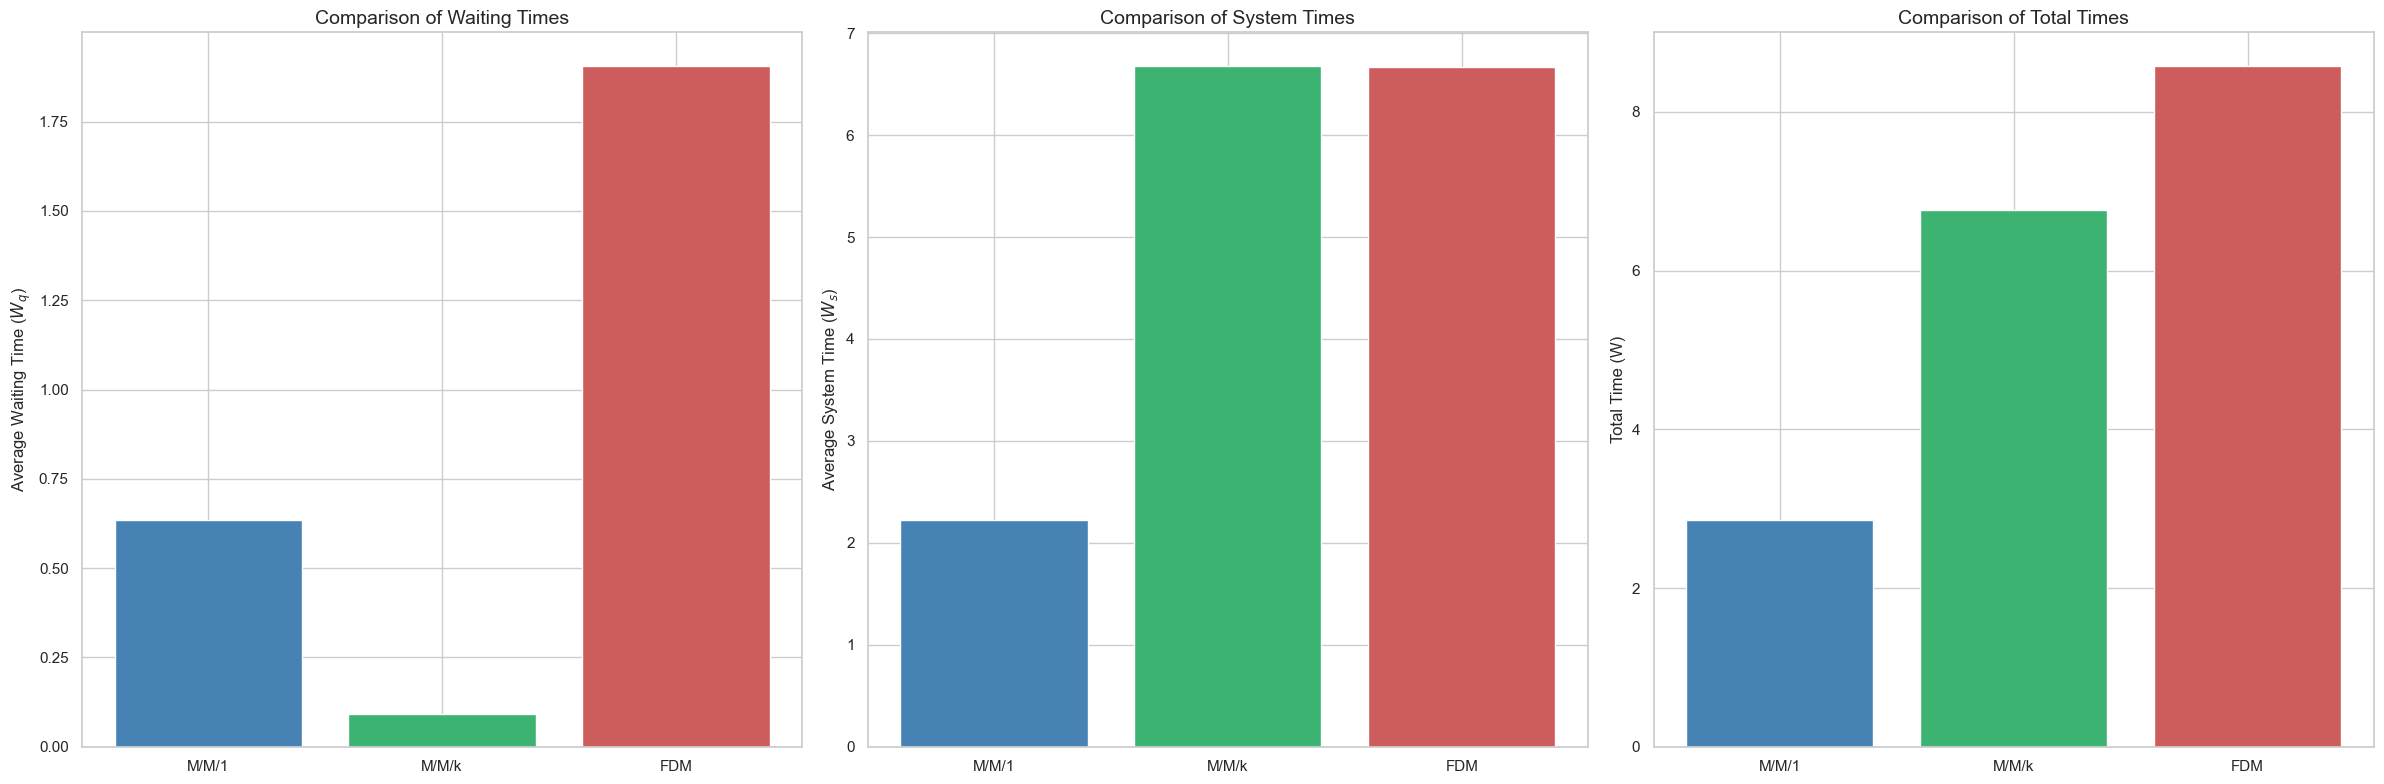

Simulating M/M/1 ...


100%|██████████| 1000000/1000000 [00:01<00:00, 743481.62it/s]


Simulating M/M/k ...


100%|██████████| 1000000/1000000 [00:01<00:00, 533874.31it/s]


Simulating FDM   ...


100%|██████████| 1000000/1000000 [00:01<00:00, 662582.25it/s]



Simulation Results (Averages over Simulation Time)
System            W_q        W_s          W Theoretical
M/M/1          0.0474     0.6660     0.7134     0.7143
M/M/k          0.0000     6.6596     6.6596     6.6667
FDM            0.4770     6.6667     7.1436     7.1429


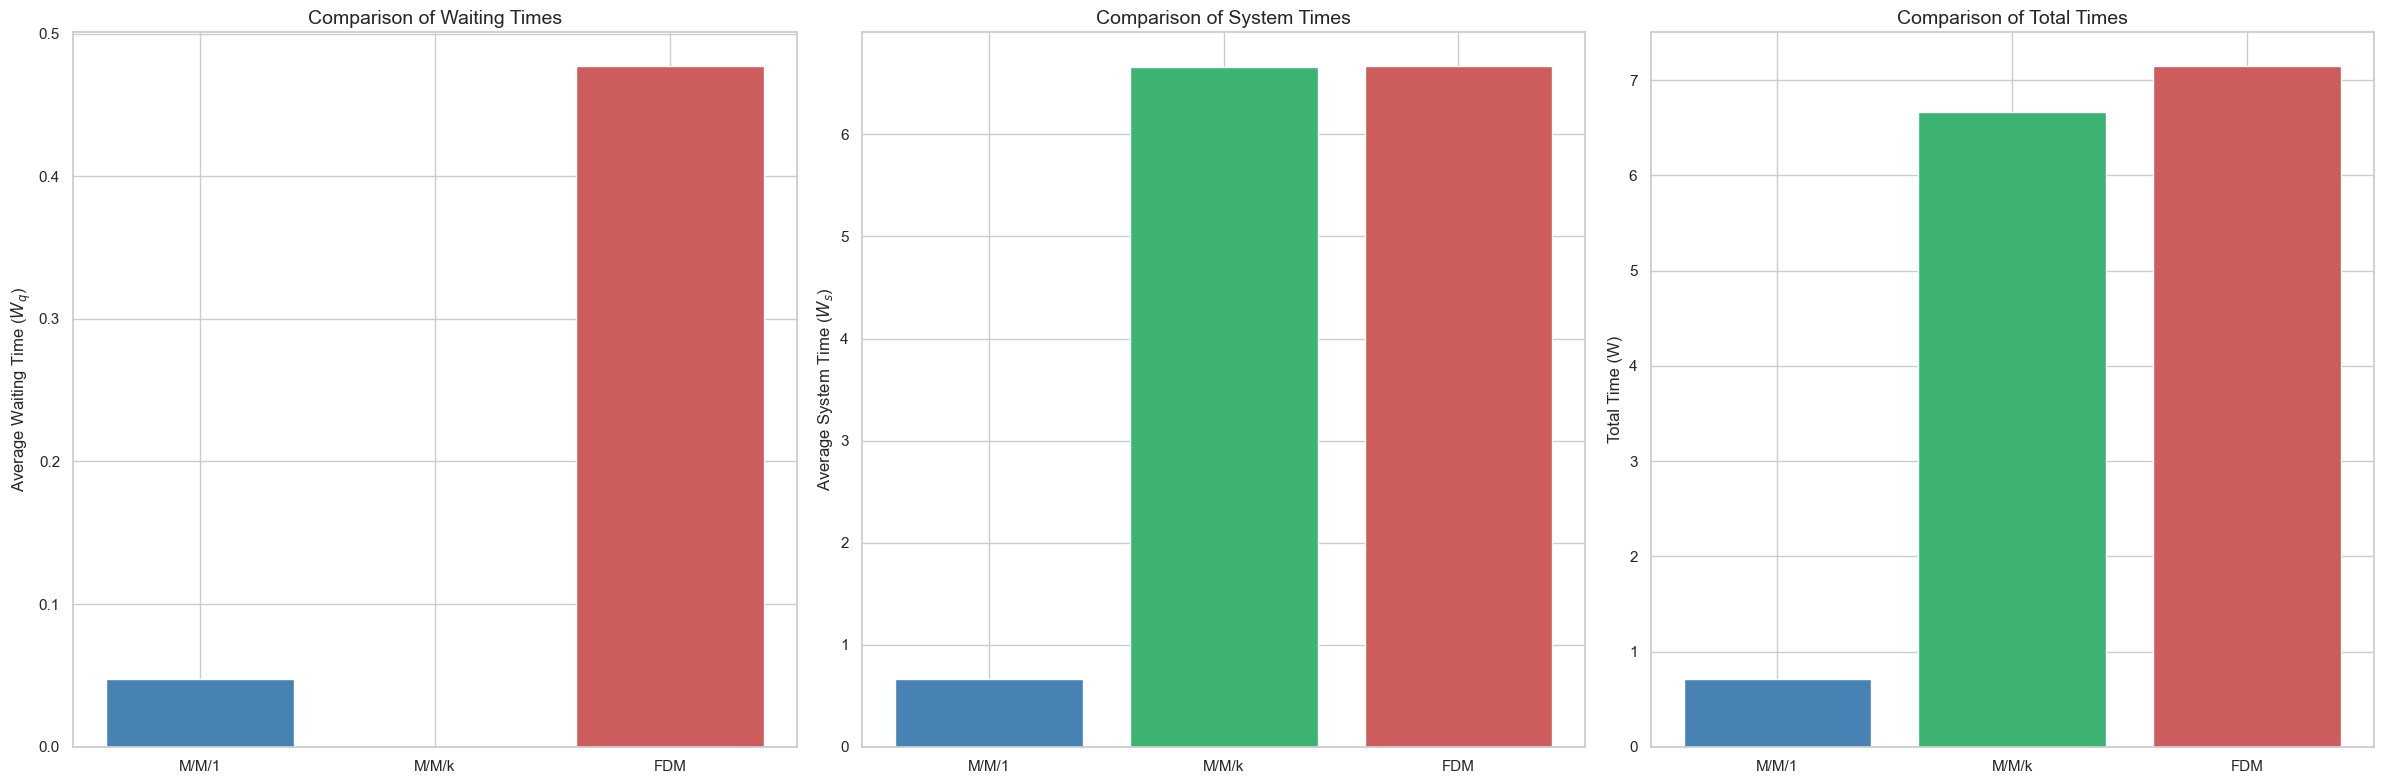

Simulating M/M/1 ...


100%|██████████| 1000000/1000000 [00:01<00:00, 688669.09it/s]


Simulating M/M/k ...


100%|██████████| 1000000/1000000 [00:01<00:00, 638135.43it/s]


Simulating FDM   ...


100%|██████████| 1000000/1000000 [00:01<00:00, 742951.29it/s]



Simulation Results (Averages over Simulation Time)
System            W_q        W_s          W Theoretical
M/M/1          0.3339     1.6655     1.9994     2.0000
M/M/k          0.0309     4.9898     5.0207     5.0303
FDM            1.0016     5.0030     6.0045     6.0000


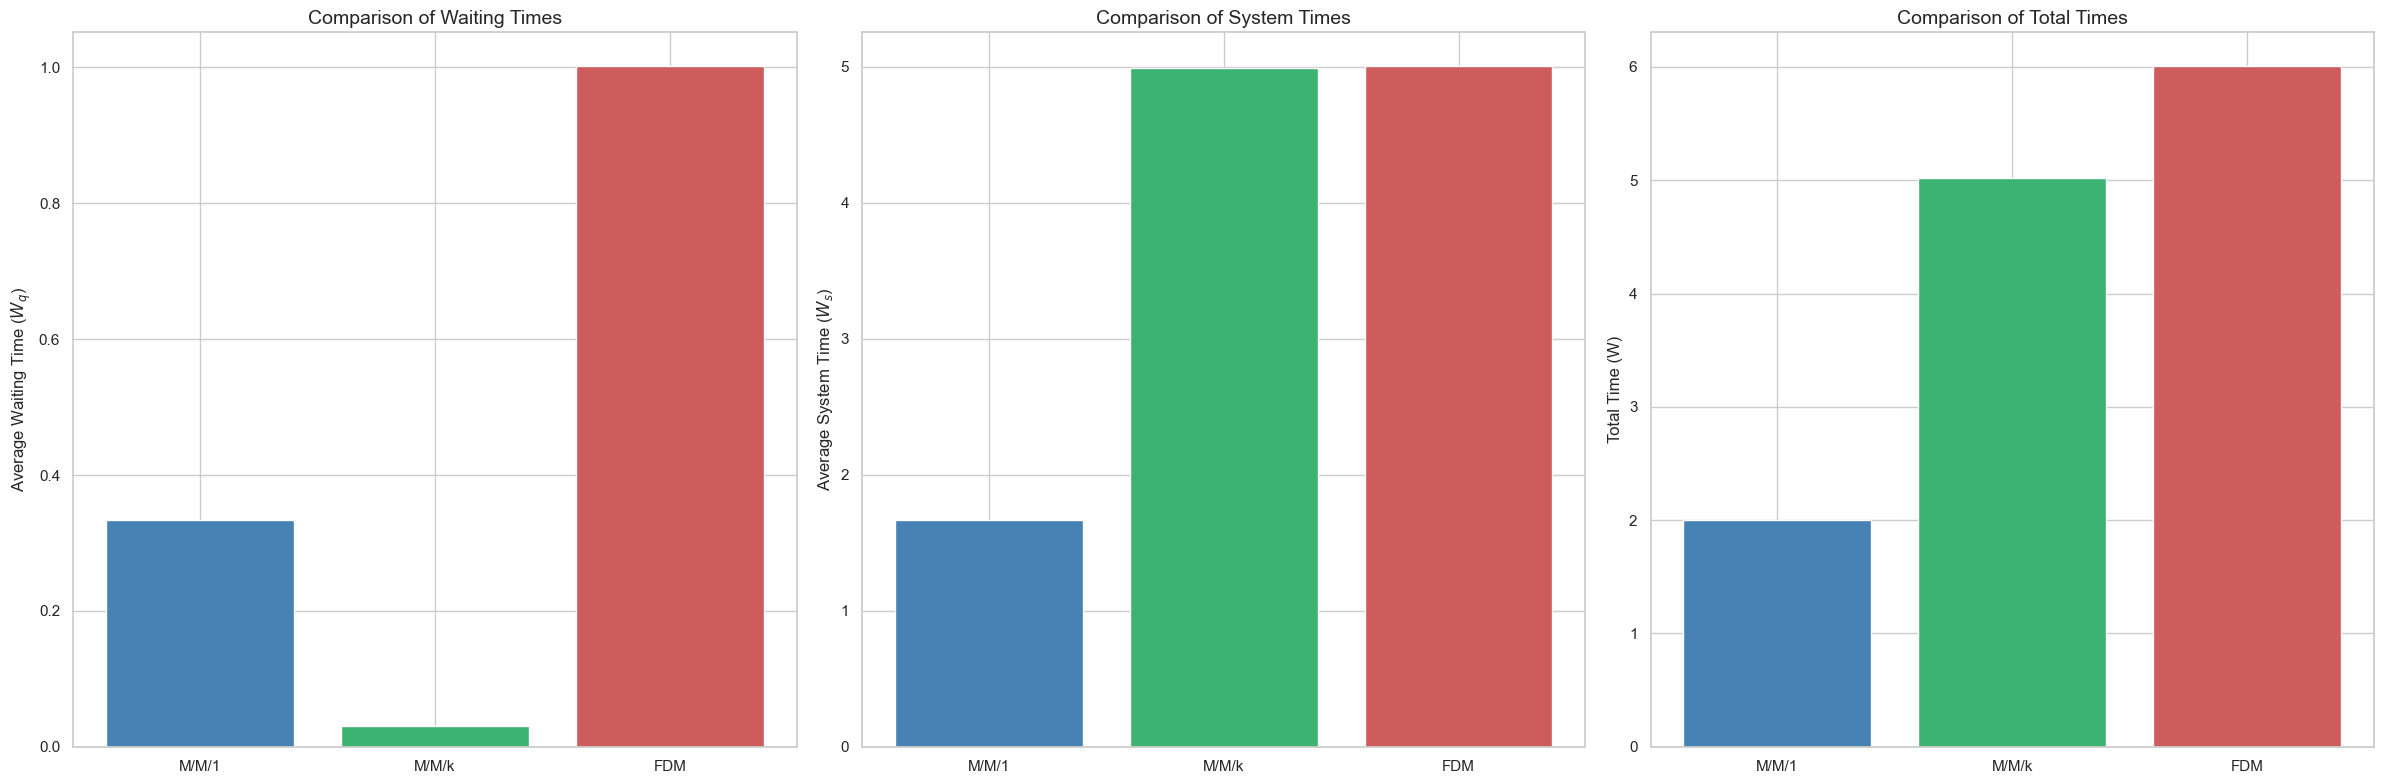

Simulating M/M/1 ...


100%|██████████| 1000000/1000000 [00:01<00:00, 724802.16it/s]


Simulating M/M/k ...


100%|██████████| 1000000/1000000 [00:02<00:00, 482660.80it/s]


Simulating FDM   ...


100%|██████████| 1000000/1000000 [00:01<00:00, 634206.34it/s]



Simulation Results (Averages over Simulation Time)
System            W_q        W_s          W Theoretical
M/M/1          0.0261     0.5000     0.5261     0.5263
M/M/k          0.0000     5.0041     5.0041     5.0000
FDM            0.2640     4.9992     5.2632     5.2632


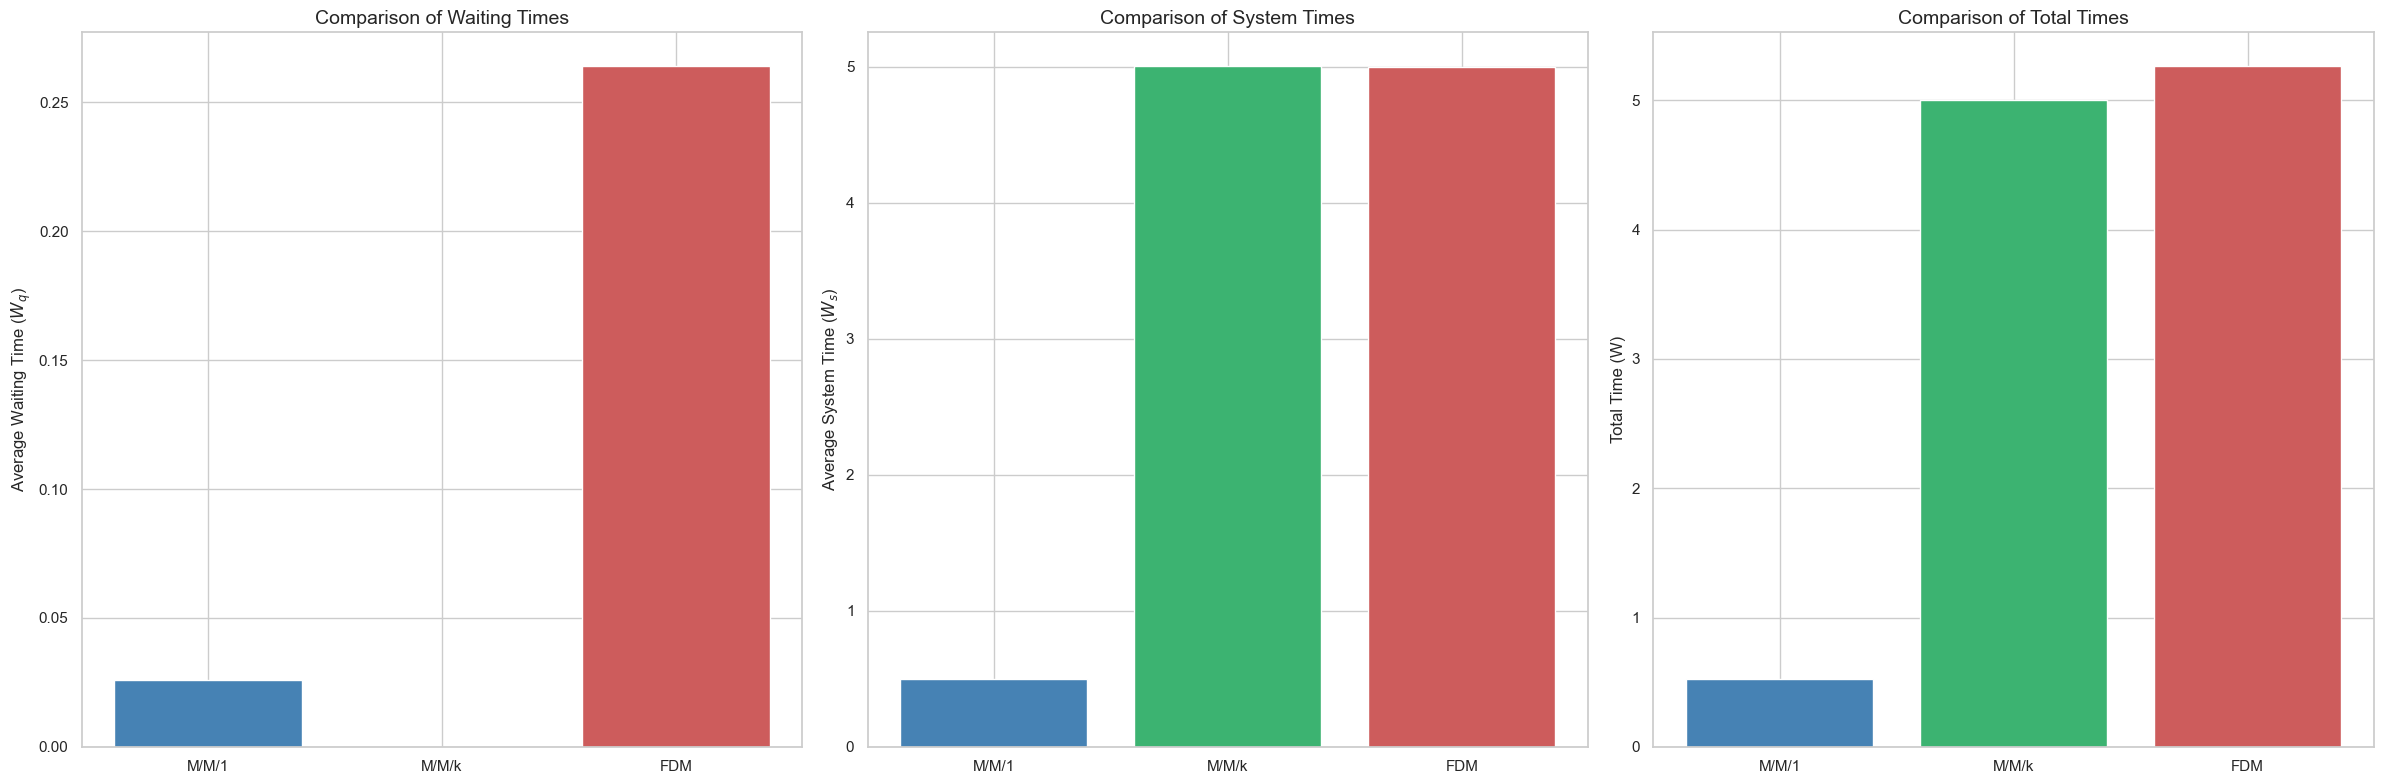

Simulating M/M/1 ...


100%|██████████| 1000000/1000000 [00:01<00:00, 675482.30it/s]


Simulating M/M/k ...


100%|██████████| 1000000/1000000 [00:01<00:00, 601564.36it/s]


Simulating FDM   ...


100%|██████████| 1000000/1000000 [00:01<00:00, 625529.85it/s]



Simulation Results (Averages over Simulation Time)
System            W_q        W_s          W Theoretical
M/M/1          0.0116     0.3335     0.3450     0.3448
M/M/k          0.0001     1.0004     1.0005     1.0001
FDM            0.0343     0.9997     1.0340     1.0345


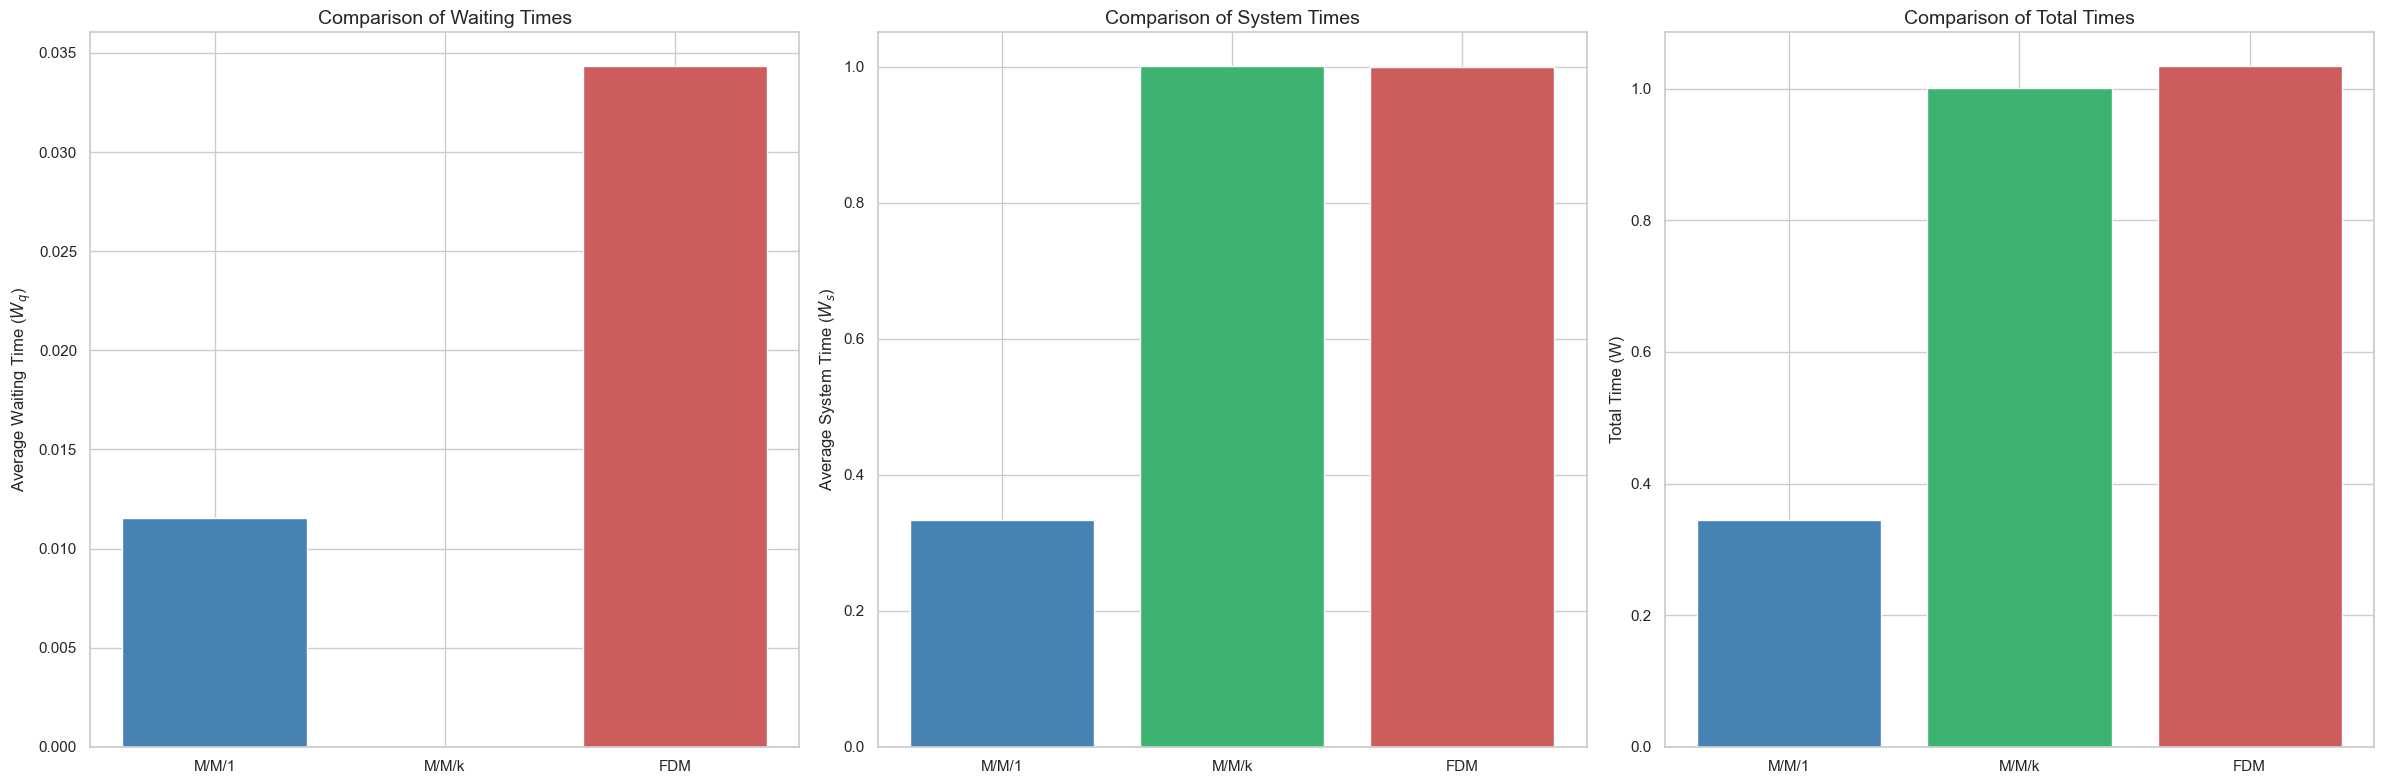

Simulating M/M/1 ...


100%|██████████| 1000000/1000000 [00:01<00:00, 603114.80it/s]


Simulating M/M/k ...


100%|██████████| 1000000/1000000 [00:02<00:00, 467943.56it/s]


Simulating FDM   ...


100%|██████████| 1000000/1000000 [00:01<00:00, 623956.84it/s]



Simulation Results (Averages over Simulation Time)
System            W_q        W_s          W Theoretical
M/M/1          0.0010     0.1000     0.1011     0.1010
M/M/k          0.0000     0.9997     0.9997     1.0000
FDM            0.0102     1.0001     1.0103     1.0101


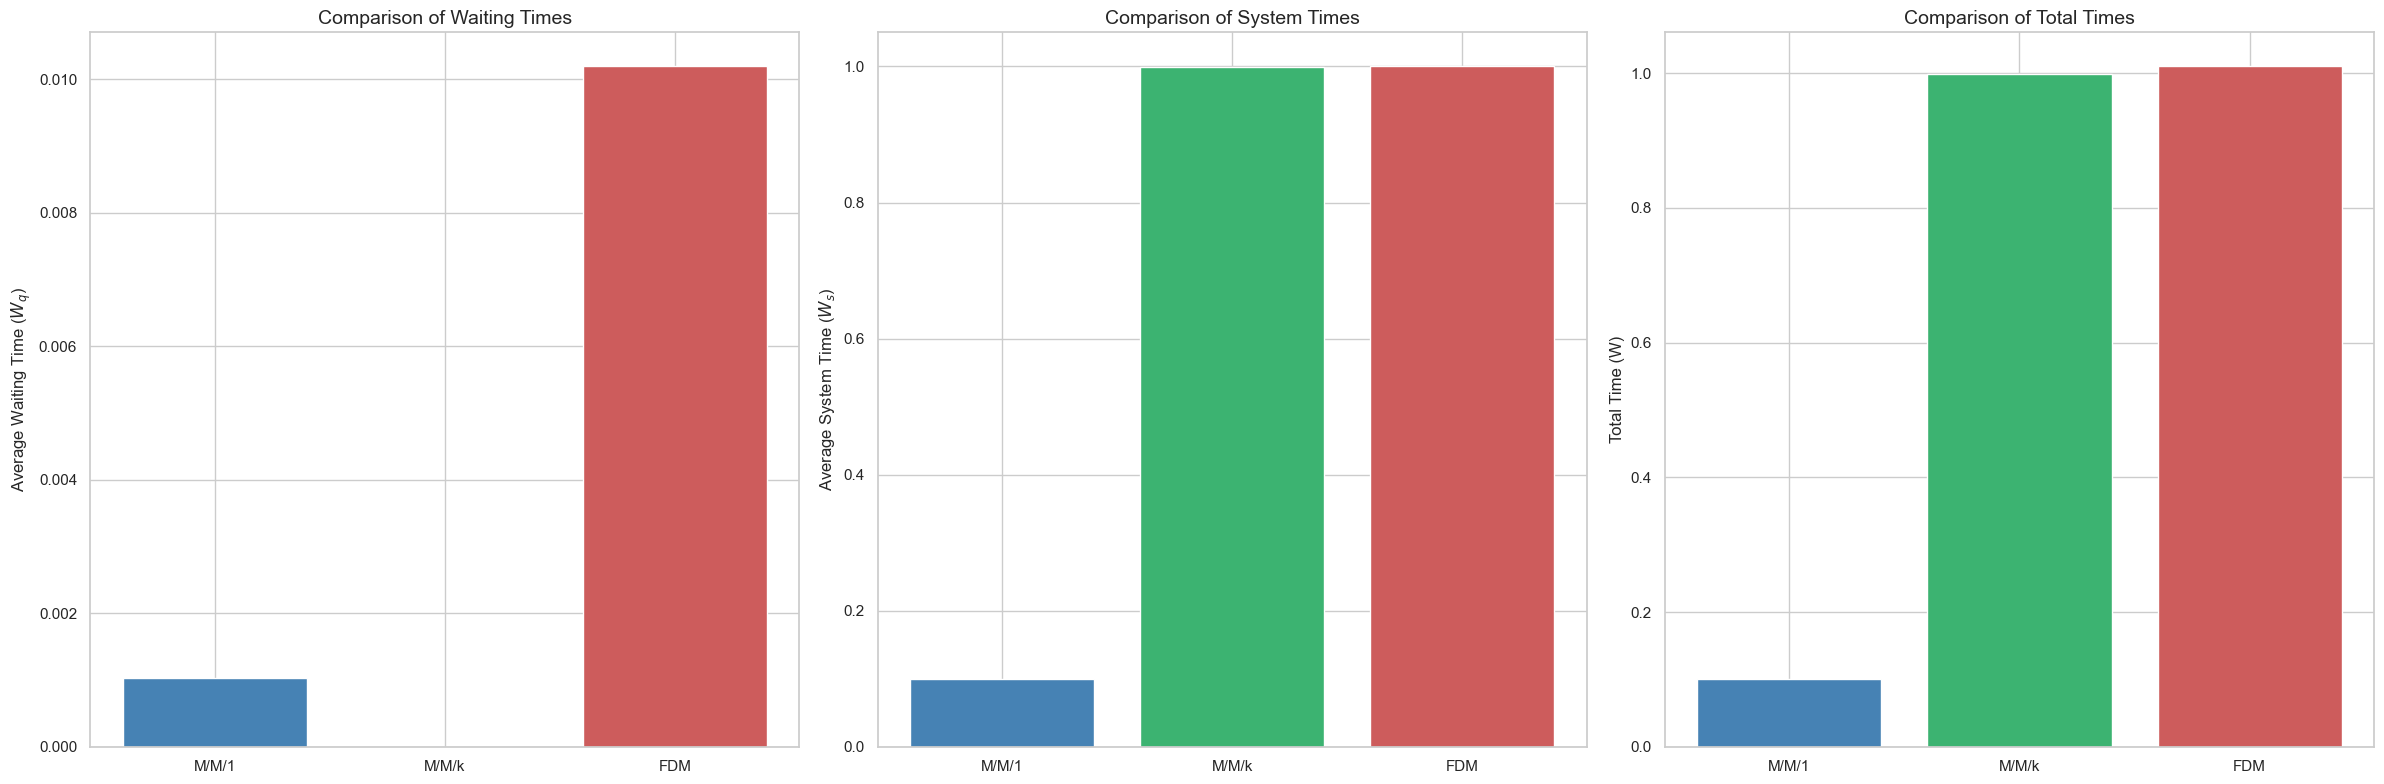

In [2]:
import numpy as np
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns


# theoretical time
def MMK_time(arrival_rate, service_rate, k):
    time = 0
    mul_frac = 1
    mul_factorial = 1
    sum = 0
    for i in range(k): # sum_{i=0}^{k-1}
        if i != 0:
            mul_factorial *= i
        sum += 1 / mul_factorial * mul_frac
        mul_frac *= arrival_rate / service_rate

    mul_factorial *= k
    sum += 1 / mul_factorial * mul_frac * (1 / (1 - arrival_rate / (k * service_rate)))
    time = 1 / service_rate
    time += mul_frac / (mul_factorial * k * service_rate * ((1 - arrival_rate / (k * service_rate)) ** 2)) / sum
    return time


def simulate_MMK(custom_num, arrival_rate, service_rate, k):
    arrival_intervals = np.random.exponential(1 / arrival_rate, custom_num - 1)
    arrival_intervals = np.concatenate(([0.0], arrival_intervals))
    arrival_times = np.cumsum(arrival_intervals)
    service_times = np.random.exponential(1 / service_rate, custom_num)

    current_time = 0.0   # Current simulation timestamp
    servers = []         # the finish time of that service
    waiting_queue = []   # each customer's (arrival_time, service_time)
    waiting_times = []   # each customer's waiting time

    for i in tqdm.tqdm(range(custom_num)):
        arrival_time = arrival_times[i]
        service_time = service_times[i]

        current_time = arrival_time
        waiting_queue.append((arrival_time, service_time))

        # Process customers in the waiting queue
        while waiting_queue:
            if len(servers) < k: # exist free serves
                arrival_time, service_time = waiting_queue.pop(0)
                # Service start time is the later of the current time and the arrival time
                start_time = max(current_time, arrival_time)
                finish_time = start_time + service_time
                servers.append((finish_time, arrival_time))
                waiting_times.append(start_time - arrival_time)

            else: # If all servers are busy, find the earliest finishing server
                servers.sort(key=lambda x: x[0])
                next_finish_time, _ = servers[0]
                # If current time is less than the next finish time, advance time to next finish
                if current_time < next_finish_time:
                    current_time = next_finish_time
                # Free the server that has finished service
                servers.pop(0)

                if not waiting_queue:
                    break

                if waiting_queue[0][0] > current_time:
                    break


    # After processing all arrivals, there may still be customers in the waiting queue
    while waiting_queue:
        if len(servers) < k:
            arrival_time, service_time = waiting_queue.pop(0)
            start_time = max(current_time, arrival_time)
            finish_time = start_time + service_time
            servers.append((finish_time, arrival_time))
            waiting_times.append(start_time - arrival_time)
        else:
            servers.sort(key=lambda x: x[0])
            next_finish_time, _ = servers[0]
            current_time = next_finish_time
            servers.pop(0)

    return np.mean(waiting_times), np.mean(service_times)


def simulate_FDM(custom_num, arrival_rate, service_rate, k):
    wait = []
    service = []
    for _ in range(k):
        avg_wait, avg_service = simulate_MMK(custom_num, arrival_rate / k, service_rate, 1)
        wait.append(avg_wait)
        service.append(avg_service)

    return np.mean(wait), np.mean(service)


def run_simulation(custom_num, arrival_rate, service_rate, k):
    results = {}

    print("Simulating M/M/1 ...")
    results['M/M/1'] = simulate_MMK(custom_num, arrival_rate, k * service_rate, 1)

    print("Simulating M/M/k ...")
    results['M/M/k'] = simulate_MMK(custom_num, arrival_rate, service_rate, k)

    print("Simulating FDM   ...")
    results['FDM'] = simulate_FDM(custom_num, arrival_rate, service_rate, k)

    print("\nSimulation Results (Averages over Simulation Time)")
    print(f"{'System':<10} {'W_q':>10} {'W_s':>10} {'W':>10} {'Theoretical':>10}")
    for system, (W_q, W_s) in results.items():
        if system == 'FDM':
            theoretical_time = MMK_time(arrival_rate / k, service_rate, 1)
        elif system == 'M/M/k':
            theoretical_time = MMK_time(arrival_rate, service_rate, k)
        elif system == 'M/M/1':
            theoretical_time = MMK_time(arrival_rate, service_rate * k, 1)
        print(f"{system:<10} {W_q:>10.4f} {W_s:>10.4f} {W_q + W_s:>10.4f} {theoretical_time:>10.4f}")

    sns.set_theme(style="whitegrid")
    labels = ['M/M/1', 'M/M/k', 'FDM']
    waiting_times = [results[key][0] for key in labels]
    system_times = [results[key][1] for key in labels]
    total_times = [results[key][0] + results[key][1] for key in labels]

    plt.figure(figsize=(24, 8))
    plt.subplot(1, 3, 1)
    plt.bar(labels, waiting_times, color=['steelblue', 'mediumseagreen', 'indianred'])
    plt.ylabel("Average Waiting Time ($W_q$)", fontsize=12)
    plt.title("Comparison of Waiting Times", fontsize=14)

    plt.subplot(1, 3, 2)
    plt.bar(labels, system_times, color=['steelblue', 'mediumseagreen', 'indianred'])
    plt.ylabel("Average System Time ($W_s$)", fontsize=12)
    plt.title("Comparison of System Times", fontsize=14)

    plt.subplot(1, 3, 3)
    plt.bar(labels, total_times, color=['steelblue', 'mediumseagreen', 'indianred'])
    plt.ylabel("Total Time (W)", fontsize=12)
    plt.title("Comparison of Total Times", fontsize=14)
    plt.tight_layout()
    plt.show()


CUSTOM_NUM = 1000000   # simulation time
run_simulation(custom_num=CUSTOM_NUM, arrival_rate=0.1, service_rate=0.15, k=3)
run_simulation(custom_num=CUSTOM_NUM, arrival_rate=0.1, service_rate=0.15, k=10)
run_simulation(custom_num=CUSTOM_NUM, arrival_rate=0.1, service_rate=0.2, k=3)
run_simulation(custom_num=CUSTOM_NUM, arrival_rate=0.1, service_rate=0.2, k=10)
run_simulation(custom_num=CUSTOM_NUM, arrival_rate=0.1, service_rate=1.0, k=3)
run_simulation(custom_num=CUSTOM_NUM, arrival_rate=0.1, service_rate=1.0, k=10)